In [1]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph 

In [2]:
class AgentState(TypedDict): # Our state schema
    message : str
        
        
def greeting_node(state: AgentState) -> AgentState:
    """Simple node that adds a greeting message to the state"""
    
    state['message'] = "Hey " + state["message"] + ", you are doing an amazing job learning LangGraph?"
    
    return state

In [3]:
graph = StateGraph(AgentState)

graph.add_node("greeter", greeting_node)

graph.set_entry_point("greeter")
graph.set_finish_point("greeter")

app = graph.compile()

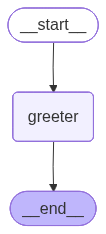

In [4]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [5]:
result = app.invoke({"message": "Bob"})

In [6]:
result["message"]

'Hey Bob, you are doing an amazing job learning LangGraph?'